Idea:

$$ R_n = \sqrt{ \frac{1}{n} \sum_{i=0}^n I_i^2 } $$



$$ R_n^2 = \frac{1}{n} \frac{n-1}{n-1} \left( I_n^2 + \sum_{i=0}^{n-1} I_i^2 \right) $$

$$ R_n^2 \frac{n}{n-1} = \frac{1}{n-1} I_n^2 + \sum_{i=0}^{n-1} \frac{1}{n-1} I_i^2 $$

$$ \sqrt{R_n^2 \frac{n}{n-1} - \frac{1}{n-1} I_n^2} =  \sqrt{\sum_{i=0}^{n-1} \frac{1}{n-1} I_i^2} = R_{n-1} $$

$$ \sqrt{\frac{nR_n^2 - I_n^2}{n-1}} = R_{n-1} $$

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from functions import *

ALMA-OrionKL-band6-methanol.fits


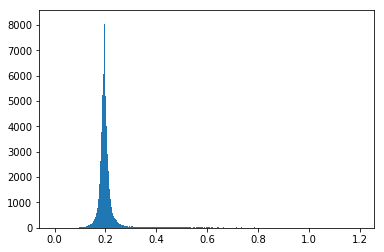

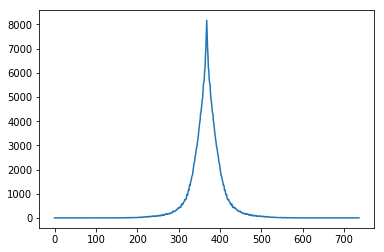

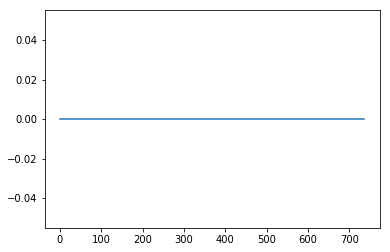

In [26]:


from astropy.io import fits
import glob
from scipy.signal import argrelextrema
flist = glob.glob("ALMA*.fits")
for ff in flist:
    print(ff)
    hdu = fits.open(ff)[0]
    cube = hdu.data[0]
    plt.figure()
    (vcube,lst) = rms_curve(cube)
    (hbins,_,_)=plt.hist(vcube, bins='auto')
    pos=hbins.argmax()
    v1=hbins[0:pos]
    v2=hbins[pos+1:2*pos+1]
    v2=v2[::-1]
    v3=np.minimum(v1,v2)
    noise_dist = np.hstack((v3,[hbins[pos]],v3[::-1]))
    #print(noise_dist)
    plt.figure()
    plt.plot(range(0,2*pos+1),noise_dist)
    dist_signal = noise_dist
    dist_signal[0:2*pos+1]-=noise_dist
    plt.figure()
    plt.plot(range(0,dist_signal.size),dist_signal)
    
    #plt.figure()
    
    #plt.plot(vcube,lst)
    #plt.plot(vcube,vcube,"c--")
    #points=argrelextrema(lst-vcube,np.less,order=100)
    #print(points[0].shape)
    #fmin=points[0][0]
    #vv = vcube[:fmin]
    #vv = np.append(vv,vv)
    #my_rms = np.sqrt(np.nansum(vv*vv/vv.size))
    #mu = np.nansum(vv/vv.size)
    #sigma2 = np.nansum((vv - mu)*(vv - mu)/vv.size)
    #mrms = np.sqrt(mu*mu + sigma2)
    #signal,residual = bayesian_separation(cube,mu,sigma2)
    #plt.plot(vcube[fmin],lst[fmin],"ro")
    #rr = np.array(range(int(vcube.max()/my_rms)+1))
    #plt.plot(my_rms*rr,0*rr,"mo")
    #plt.show()
    #print(cube_rms(ncube))
    #plt.imshow(np.nansum(cube,axis=(0)))
    #plt.show()
    #plt.figure()
    #plt.imshow(np.nansum(ncube,axis=(0)))
    #plt.show()
    #plt.figure()
    #plt.plot(vcube,lst)
    #plt.plot(vcube[fmin],lst[fmin],"ro")
    #plt.show()

In [ ]:
import numpy as np
neigh =np.array([[0,0,0],[0,0,1],[0,0,-1],[0,1,0],[0,-1,0],[1,0,0],[-1,0,0]])

In [ ]:
v=np.array([13,2,4]) - neigh

In [ ]:
a=[v[:,0] <= 13] * [v[:,0] >= 0]
a